In [3]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import plot_utils as plu
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

## PCA

### Compute PCs

In [4]:
##Importation des données

#datafile_name='/home/maiwen/TER/artificial_genomes/1000G_real_genomes/10K_SNP_1000G_real.hapt/10K_SNP_1000G_real.hapt'
datafile_name= '/home/maiwen/TER/artificial_genomes/1000G_real_genomes/805_SNP_1000G_real.hapt'
real_df=pd.read_csv(datafile_name,delimiter=' ')
legendfile_name='/home/maiwen/TER/artificial_genomes/1000G_real_genomes/igsr_samples.tsv'
labels_df=pd.read_csv(legendfile_name,header=0, sep='\t')
labels_df.head()

,Sample name,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,HG00271,male,SAME123417,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,HG00276,female,SAME123424,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00288,female,SAME1839246,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,HG00290,male,SAME1839057,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,HG00303,male,SAME1840115,FIN,Finnish,EUR,European Ancestry,FIN,1000 Genomes on GRCh38


In [5]:
# Remove the last two characters from the sequence keys
real_df.iloc[:, 1] = real_df.iloc[:, 1].astype(str).str[:-2]

# Merge labels with SNP data using the modified key column
merged_df = real_df.merge(labels_df[['Sample name','Superpopulation code']], left_on=real_df.iloc[:, 1], right_on='Sample name', how='inner')
merged_df[1:5]

,Real,HG00096_A,1,1.1,0,1.2,1.3,1.4,1.5,1.6,...,0.441,0.442,0.443,0.444,0.445,0.446,1.356,1.357,Sample name,Superpopulation code
1,Real,HG00097,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,1,0,HG00097,EUR
2,Real,HG00097,1,1,0,1,0,1,1,1,...,0,0,0,1,1,0,0,0,HG00097,EUR
3,Real,HG00099,1,0,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,HG00099,EUR
4,Real,HG00099,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,HG00099,EUR


In [6]:
#on enlève les colonnes qvaec les légendes
columns_to_use = real_df.columns[2:]
df_subset = real_df[columns_to_use]

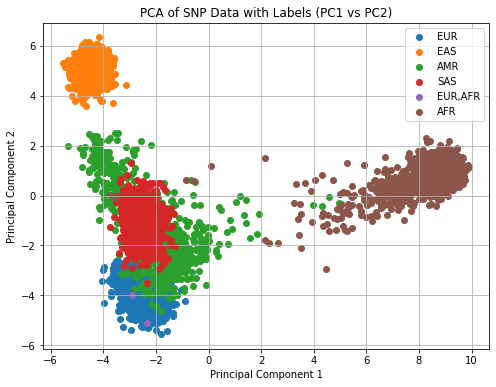

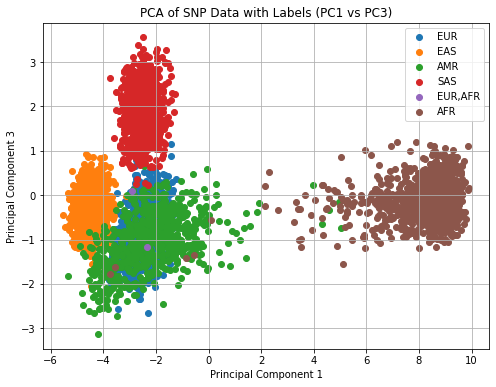

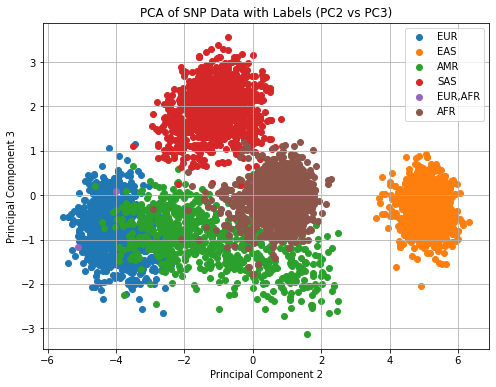

In [7]:
num_components=3
pca=PCA(n_components=num_components)

pca_result = pca.fit_transform(df_subset)


# Loop through each pair of principal components for plotting
for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.figure(figsize=(8, 6))
        for label in merged_df['Superpopulation code'].unique():
            subset = merged_df[merged_df['Superpopulation code'] == label]
            plt.scatter(pca_result[subset.index, i], pca_result[subset.index, j], label=label)
        
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.title(f'PCA of SNP Data with Labels (PC{i+1} vs PC{j+1})')
        plt.legend()
        plt.grid(True)
        plt.show()

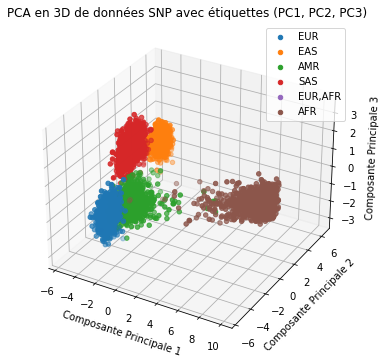

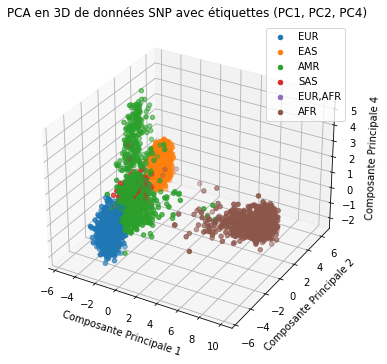

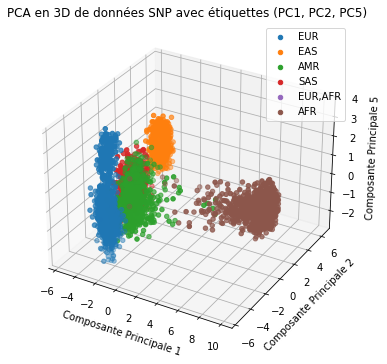

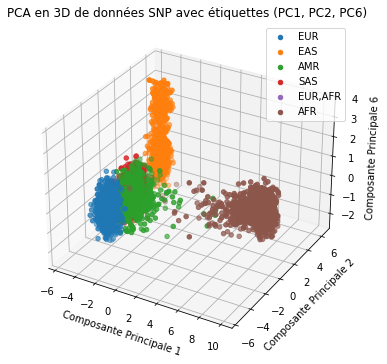

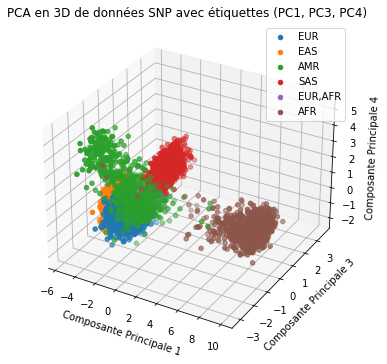

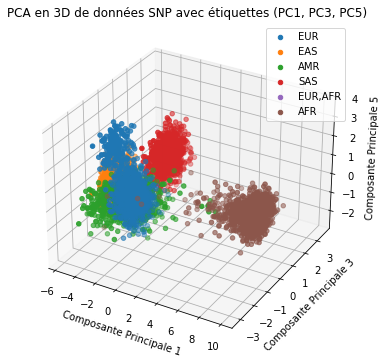

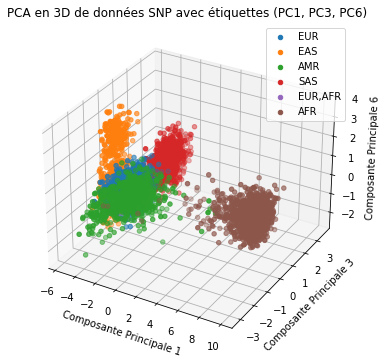

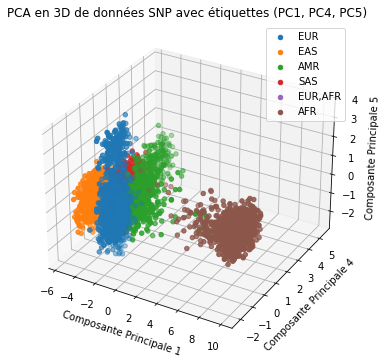

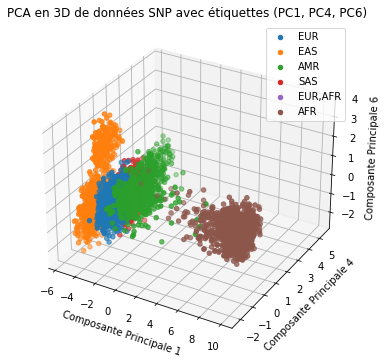

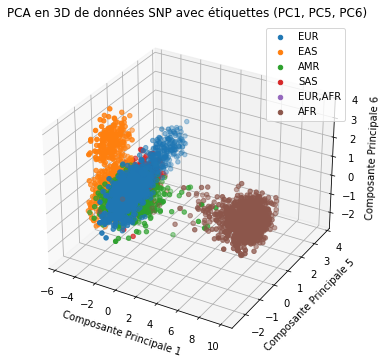

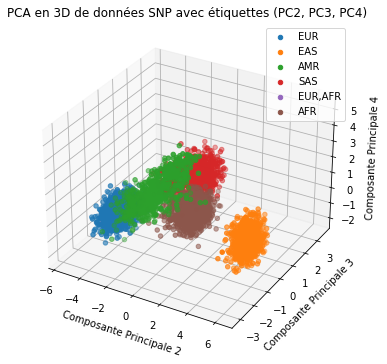

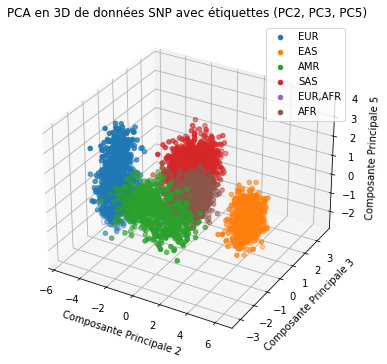

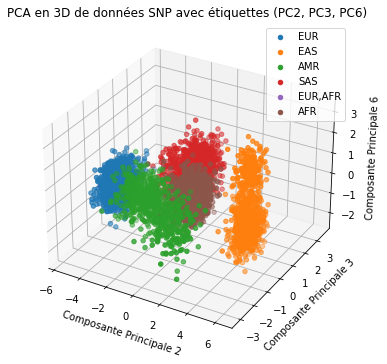

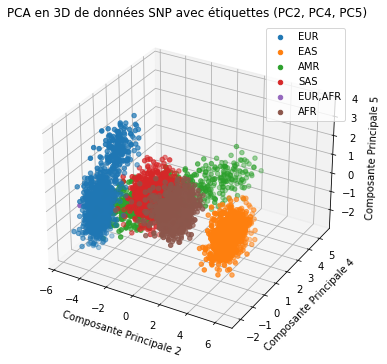

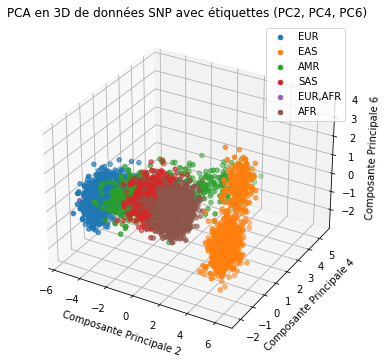

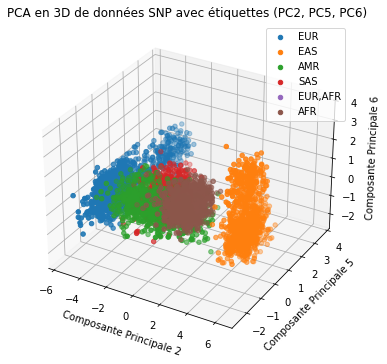

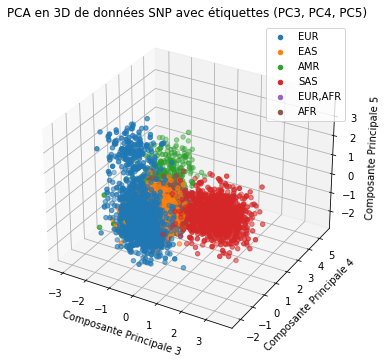

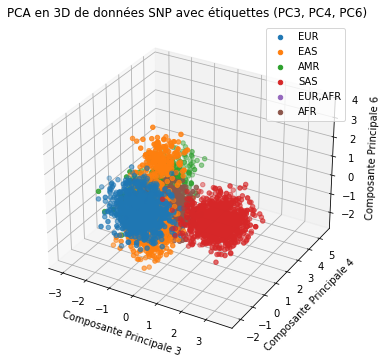

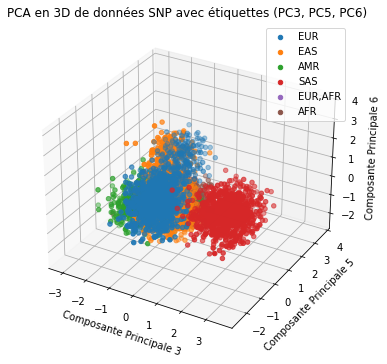

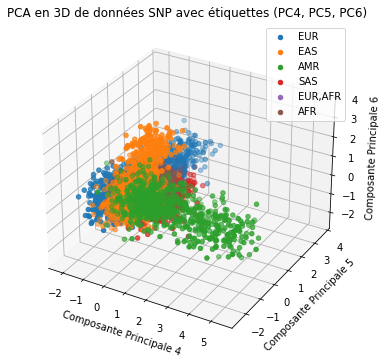

In [9]:
# Effectuer une boucle pour toutes les combinaisons possibles de 3 composantes principales parmi les 6
combinations = [(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5),
               (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]

for i, (component1, component2, component3) in enumerate(combinations):
    # Effectuer une PCA sur le sous-ensemble de vos données avec 3 composantes principales
    nombre_de_composantes = 6  # Réglez-le sur 6 pour une PCA en 3D
    pca = PCA(n_components=nombre_de_composantes)
    resultat_pca = pca.fit_transform(df_subset)

    # Créer un graphique de dispersion en 3D pour la combinaison actuelle
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for label in merged_df['Superpopulation code'].unique():
        subset = merged_df[merged_df['Superpopulation code'] == label]
        ax.scatter(resultat_pca[subset.index, component1], resultat_pca[subset.index, component2], resultat_pca[subset.index, component3], label=label)

    ax.set_xlabel(f'Composante Principale {component1 + 1}')
    ax.set_ylabel(f'Composante Principale {component2 + 1}')
    ax.set_zlabel(f'Composante Principale {component3 + 1}')
    plt.title(f'PCA en 3D de données SNP avec étiquettes (PC{component1 + 1}, PC{component2 + 1}, PC{component3 + 1})')
    plt.legend()
    plt.grid(True)
    plt.show()